In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from load_utils import *
from analysis_utils import compare_groups

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
df_diffs = load_diffs()

In [4]:
df_block_events, df_blocked_user_text = load_block_events_and_users()

### How many user talk comments before first attacking comment? 



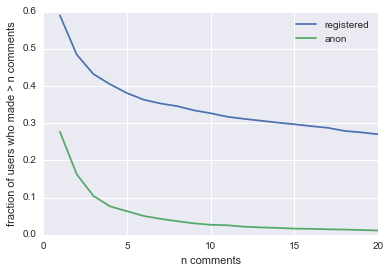

In [20]:
t = 0.5

df_first_attack = df_diffs['2015'].query('pred_recipient_score>=%s' % t).sort('rev_timestamp')\
                    .assign(timestamp = lambda x: x.rev_timestamp)\
                    .groupby(['user_text'], as_index=False).first()[['user_text', 'timestamp']]
    

df_counts = df_diffs['2015'].merge(df_first_attack, how = 'inner', on = 'user_text')\
                .assign(delta = lambda x: (x['timestamp'] - x['rev_timestamp']).apply(lambda x: x.days) + 1)\
                .query('delta >=1')
        
def atleast(s):
    s = s.value_counts().value_counts().sort_index()
    n = s.sum()
    return 1 - s.cumsum()/n

s = atleast(df_counts['user_text'])
sr = atleast(df_counts.query('not author_anon')['user_text'])
sa = atleast(df_counts.query('author_anon')['user_text'])

#plt.plot(s.head(20), label = '')
plt.plot(sr.head(20), label = 'registered')
plt.plot(sa.head(20), label = 'anon')

plt.xlabel('n comments')
plt.ylabel('fraction of users who made > n comments')
plt.legend()

Anons produce far fewer comments before their first attack than registered users. This could indicate that anons are more likely to by "drive-by" vandals. Or just be a product of anons not staying around very long in general. 

### How long are users around before their first block event?  (Change for first attack and move)

TODO: make days active instead of days since registration

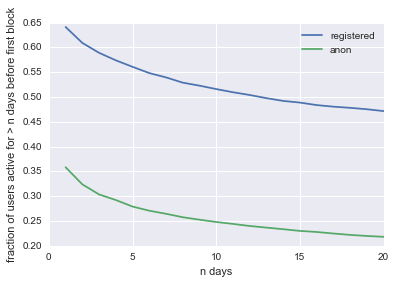

In [21]:
t = 0.5

d_first_post = df_diffs['2015'].sort('rev_timestamp', inplace= False)\
                    .groupby(['user_text', 'author_anon'], as_index=False).first()\
                    [['user_text', 'author_anon', 'rev_timestamp']]
        
df_first_attack = df_diffs['2015'].query('pred_recipient_score>=%s' % t).sort('rev_timestamp')\
                    .assign(timestamp = lambda x: x.rev_timestamp)\
                    .groupby(['user_text'], as_index=False).first()[['user_text', 'timestamp']]
    

dd = d_first_post.merge(df_first_block, how = 'inner', on = 'user_text')\
                .assign(delta = lambda x: (x['timestamp'] - x['rev_timestamp']).apply(lambda x: x.days) + 1)\
                .query('delta >=1')
        
def atleast(s):
    s = s.value_counts().sort_index()
    n = s.sum()
    return 1 - s.cumsum()/n

s = atleast(d['delta'])
sr = atleast(d.query('not author_anon')['delta'])
sa = atleast(d.query('author_anon')['delta'])

#plt.plot(s.head(20), label = '')
plt.plot(sr.head(20), label = 'registered')
plt.plot(sa.head(20), label = 'anon')
plt.legend()

plt.xlabel('n days')
plt.ylabel('fraction of users active for > n days before first attack')
plt.legend()

Similarly, anons are registered for fewer days than registered users before their first attack. Half of registered users where registered for over 14 days before attack.